### License
#### Copyright (c) 2024 robert.bhero@gwu.edu
#### MIT License
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

In [41]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('202404-capitalbikeshare-tripdata.csv')

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

In [42]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Let's consider the GWSB station "22nd & H St NW"

### Bike Availability: Number of Pickups

In [43]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

started_at_date
2024-02-01    33
2024-02-02    23
2024-02-03    22
2024-02-04    18
2024-02-05    19
              ..
2024-04-26    33
2024-04-27    18
2024-04-28    36
2024-04-29    37
2024-04-30    40
Name: started_at_date, Length: 90, dtype: int64

### Dock Availability: Number of Dropoffs

In [44]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

ended_at_date
2024-02-01    33
2024-02-02    25
2024-02-03    20
2024-02-04    19
2024-02-05    23
              ..
2024-04-26    39
2024-04-27    24
2024-04-28    28
2024-04-29    38
2024-04-30    39
Name: ended_at_date, Length: 90, dtype: int64

## Merge PU and DO tables
- For each day, we look at the numbers of pickups and dropoffs

In [45]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts

,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [46]:
df_weather = pd.read_csv('DC_weather_2024.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


## Drop variables of your choice

In [47]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge df_weather with PU_DO_counts

In [48]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Prepare training and test data

In [49]:
# we have two target variables: PU_ct and DO_ct
y = merged_df[['PU_ct','DO_ct']]
X_all = merged_df.drop(columns=['PU_ct','DO_ct']) # all features
X_all

,date,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,34.0,74.0,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,35.5,65.1,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,26.2,53.8,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,26.0,56.4,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,26.0,57.4,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-04-26,2024-04-26,64.9,45.5,55.2,64.9,41.5,54.2,34.9,50.8,...,15.4,116.4,1029.5,69.1,9.9,215.0,18.5,9,0.59,partly-cloudy-day
86,2024-04-27,2024-04-27,60.1,51.9,55.7,60.1,51.9,55.7,45.4,69.0,...,10.0,149.9,1030.1,97.3,9.7,44.0,3.9,2,0.63,rain
87,2024-04-28,2024-04-28,83.1,55.8,67.0,83.3,55.8,67.1,56.4,70.6,...,10.0,170.0,1021.3,62.1,9.8,213.6,18.5,9,0.67,partly-cloudy-day
88,2024-04-29,2024-04-29,88.3,62.7,75.2,88.9,62.7,75.3,60.9,63.5,...,13.0,177.3,1015.6,35.8,9.9,204.5,17.8,9,0.70,partly-cloudy-day


## Reduce dimensions by feature type

In [50]:
#dimentionality reduction: PCA
def dim_red(dataframe,lists,columnname):
    #extract the columns
    datagroup=dataframe.filter(lists)
    #normalize the data
    from sklearn.preprocessing import StandardScaler
    data_norm = StandardScaler().fit_transform(datagroup)
    #feature extraction with PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=1)
    PCs = pca.fit_transform(datagroup)

    df_pca = pd.DataFrame(data = PCs, columns = [columnname])
    return df_pca

In [51]:
temp_group=['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike','dew']
precip_group=['humidity','precip', 'precipprob', 'precipcover']
vis_group=['visibility','solarradiation', 'solarenergy', 'uvindex']
wind_group=['windgust','windspeed', 'winddir']

In [52]:
temp_PC1=dim_red(X_all,temp_group,'temp_PC1')
precip_PC1=dim_red(X_all,precip_group,'precip_PC1')
vis_PC1=dim_red(X_all,vis_group,'vis_PC1')
wind_PC1=dim_red(X_all,wind_group,'wind_PC1')

## Dimension reduction on the features
- Now we call the following features X

In [53]:
X = pd.concat([temp_PC1,precip_PC1,vis_PC1,wind_PC1],axis = 1)
X

,temp_PC1,precip_PC1,vis_PC1,wind_PC1
0,-23.616810,-32.623727,4.466466,-0.835152
1,-11.905681,62.494225,-80.995297,162.790919
2,-26.760771,-36.797274,11.641535,163.281210
3,-26.853470,-36.260085,15.152105,-104.272810
4,-28.487066,-36.053473,13.052631,-156.681869
...,...,...,...,...
85,7.209137,-37.417107,83.053732,-75.127468
86,14.738853,63.300059,-88.705521,-41.772262
87,47.863874,-33.326205,81.659100,-21.678490
88,65.008395,-34.793145,72.539192,-14.306077


## <font color="red"> Important: train_test_split with y=['PU_ct','DO_ct']. Why? <font>

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

In [55]:
y_train.head()

,PU_ct,DO_ct
73,26,24
60,26,22
18,10,15
44,19,20
4,19,23


# <font color="red"> Your code starts from here... </font>
- In this assignment, we first reduce the dimensions and then use only [temp_PC1,precip_PC1,vis_PC1,wind_PC1] for prediction.
- Follow the discussion and details in Lecture 6.
- Based on the analysis and result, summarize a 5-page final report in PDF.
- Submit the final report with Python file.

Summary Statistics:
            temp_PC1    precip_PC1       vis_PC1      wind_PC1      PU_ct  \
count  9.000000e+01  9.000000e+01  9.000000e+01  9.000000e+01  90.000000   
mean   1.278977e-14 -1.500035e-15  3.568504e-14 -4.105358e-15  25.788889   
std    2.663702e+01  5.049623e+01  6.538216e+01  1.063508e+02   9.575829   
min   -4.656371e+01 -4.117743e+01 -1.174665e+02 -1.885948e+02   2.000000   
25%   -2.351309e+01 -3.768570e+01 -5.604744e+01 -8.955340e+01  18.250000   
50%   -5.098084e-01 -3.550595e+01  8.054001e+00 -1.141693e+01  26.000000   
75%    1.575963e+01  6.304175e+01  5.405860e+01  1.066164e+02  33.000000   
max    6.500839e+01  7.825041e+01  1.410322e+02  1.632812e+02  47.000000   

           DO_ct  
count  90.000000  
mean   26.088889  
std     9.768839  
min     4.000000  
25%    19.000000  
50%    26.000000  
75%    33.000000  
max    49.000000  


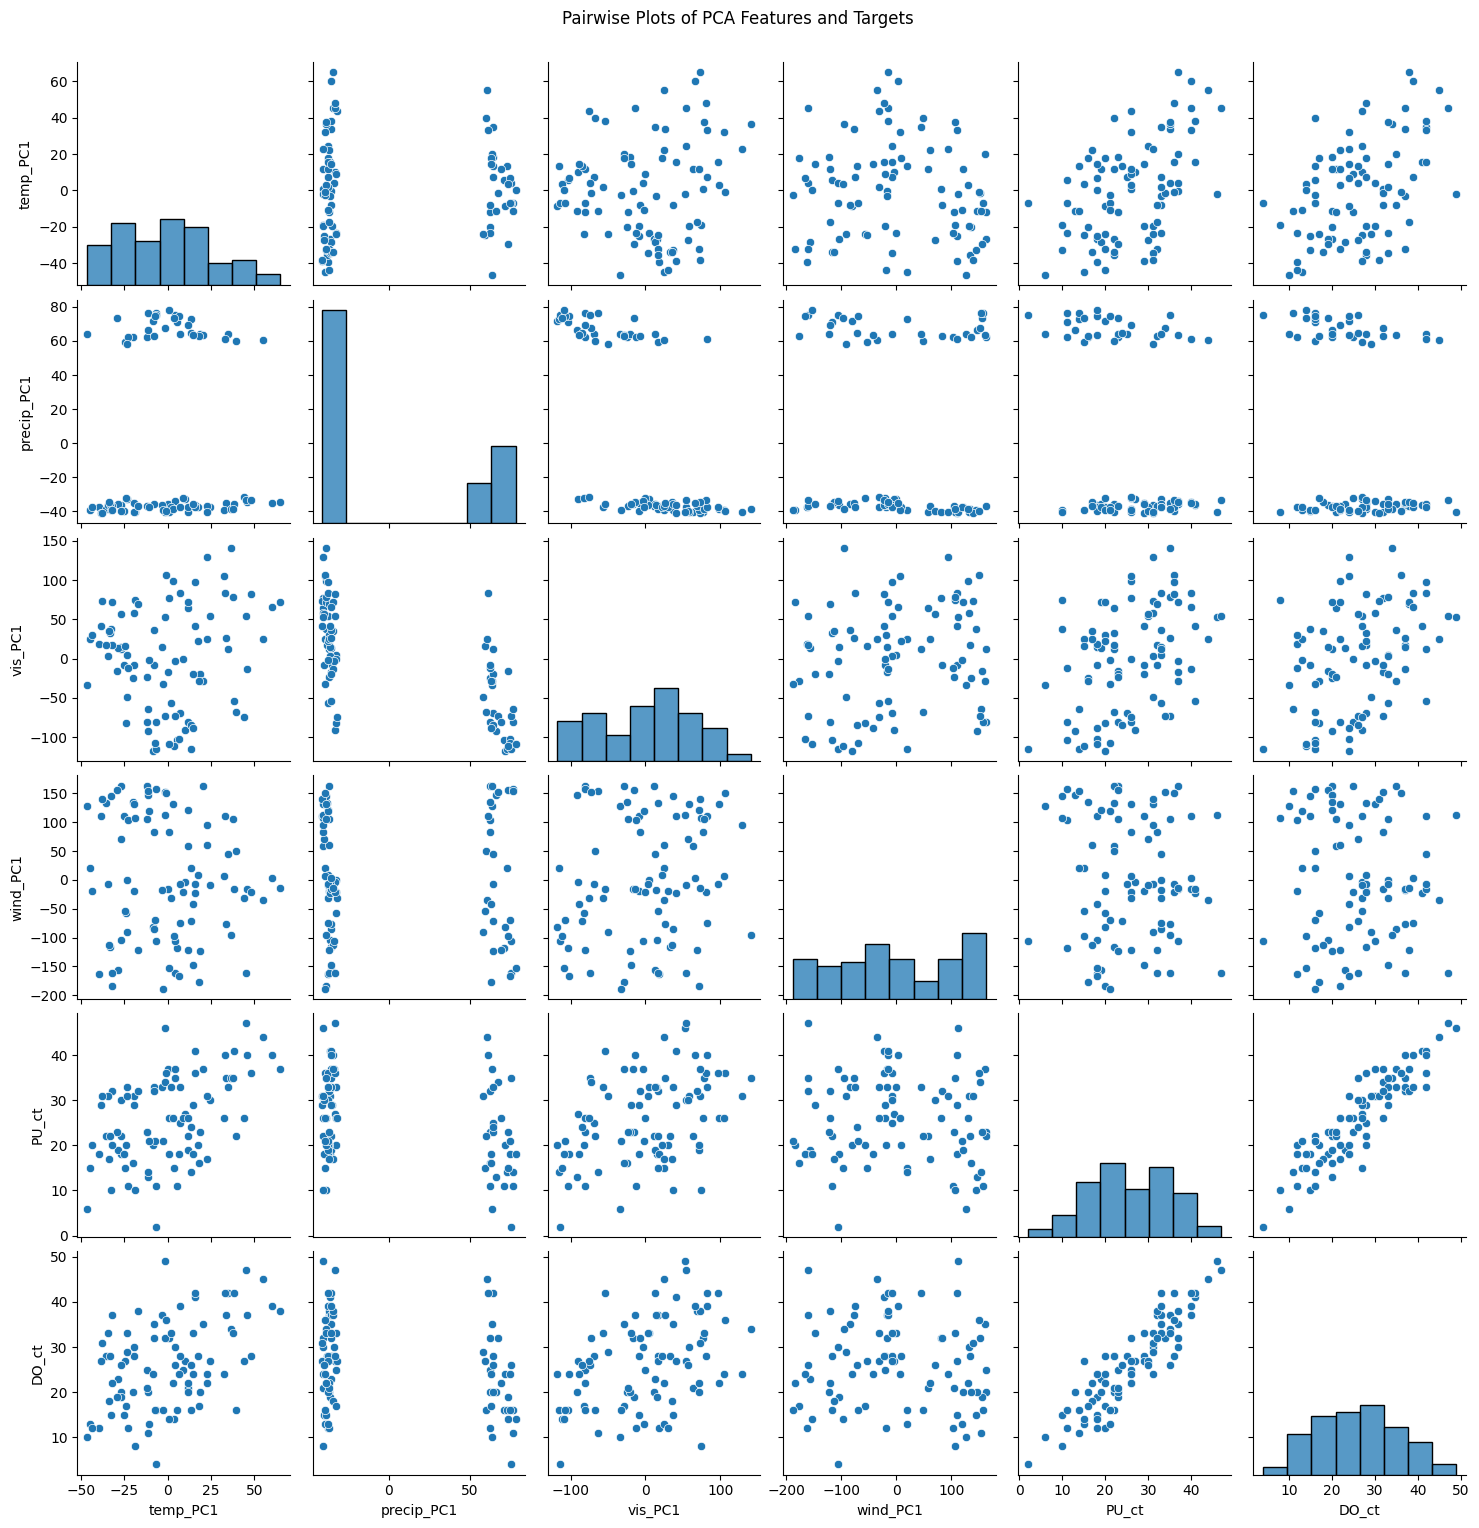

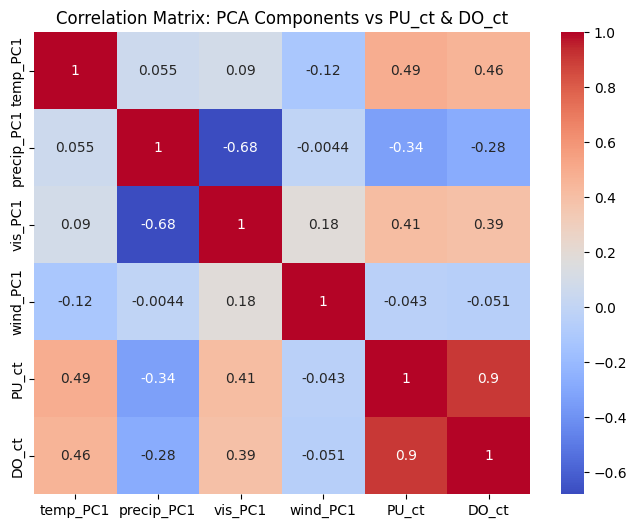

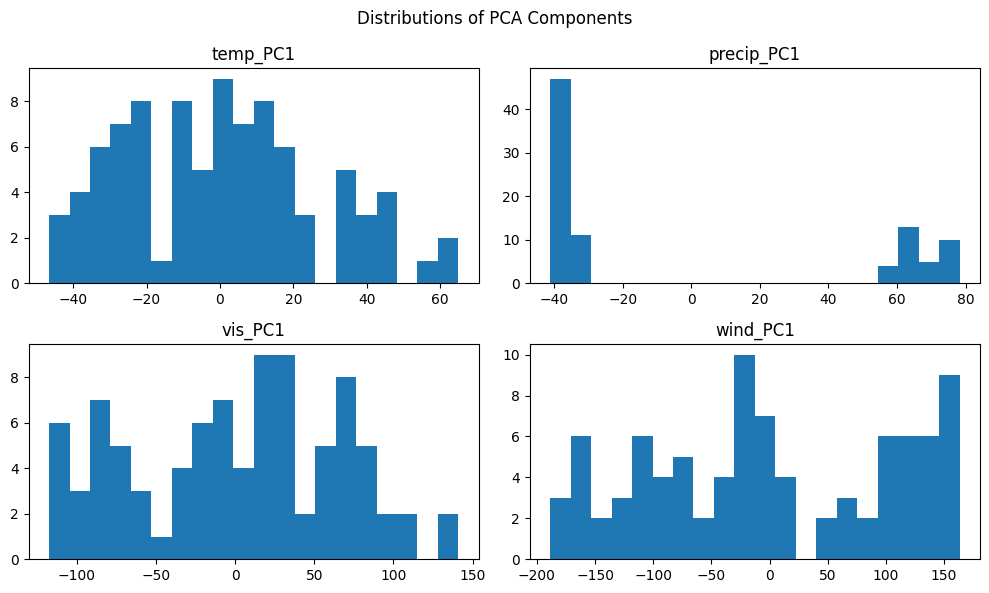

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine with target for correlation analysis
eda_df = pd.concat([X, y], axis=1)

# Summary statistics
print("Summary Statistics:\n", eda_df.describe())

# Pairplot of PCA components and targets
sns.pairplot(eda_df)
plt.suptitle("Pairwise Plots of PCA Features and Targets", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(eda_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: PCA Components vs PU_ct & DO_ct")
plt.show()

# Individual histograms of PCA features
X.hist(bins=20, figsize=(10,6), layout=(2,2), grid=False)
plt.suptitle("Distributions of PCA Components")
plt.tight_layout()
plt.show()


## Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Separate Targets ---
y_train_pu = y_train['PU_ct']
y_train_do = y_train['DO_ct']
y_test_pu = y_test['PU_ct']
y_test_do = y_test['DO_ct']

# --- Train Linear Model for PU_ct ---
lr_pu = LinearRegression()
lr_pu.fit(X_train, y_train_pu)
y_pred_pu = lr_pu.predict(X_test)

cv_scores_pu = cross_val_score(lr_pu, X_train, y_train_pu, cv=5, scoring='neg_mean_squared_error')
print("PU_ct CV MSE (mean):", -np.mean(cv_scores_pu))

# --- Train Linear Model for DO_ct ---
lr_do = LinearRegression()
lr_do.fit(X_train, y_train_do)
y_pred_do = lr_do.predict(X_test)

cv_scores_do = cross_val_score(lr_do, X_train, y_train_do, cv=5, scoring='neg_mean_squared_error')
print("DO_ct CV MSE (mean):", -np.mean(cv_scores_do))

# --- Test Set MSEs ---
mse_pu = mean_squared_error(y_test_pu, y_pred_pu)
mse_do = mean_squared_error(y_test_do, y_pred_do)

print("Final Test MSE for PU_ct:", mse_pu)
print("Final Test MSE for DO_ct:", mse_do)

# --- Out-of-Sample Cost Calculation ---
alpha = 2
beta = 3
total_capacity = 17
total_cost_test_y_all = []

for i in range(len(y_pred_pu)):
    min_total_cost = float('inf')
    for x in range(total_capacity + 1):
        y_val = total_capacity - x
        cost = alpha * max(0, y_pred_pu[i] - x) + beta * max(0, y_pred_do[i] - y_val)
        if cost < min_total_cost:
            min_total_cost = cost
            optimal_x = x
            optimal_y = y_val

    actual_cost = alpha * max(0, y_test_pu.iloc[i] - optimal_x) + \
                  beta * max(0, y_test_do.iloc[i] - optimal_y)
    total_cost_test_y_all.append(actual_cost)

out_of_sample_avg_cost = np.sum(total_cost_test_y_all) / len(total_cost_test_y_all)
print("Out-of-sample average cost (separate Linear Models):", out_of_sample_avg_cost)


PU_ct CV MSE (mean): 70.28011521553769
DO_ct CV MSE (mean): 74.22334791595966
Final Test MSE for PU_ct: 55.58050368006412
Final Test MSE for DO_ct: 69.54655617514607
Out-of-sample average cost (separate Linear Models): 76.63888888888889


## Ridge Regression

In [58]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Code from Chatgpt

# --- Constants ---
ALPHA = 2  # Cost per unmet pickup
BETA = 3   # Cost per unmet drop-off
TOTAL_RESOURCES = 17  # x + y = 17

# --- Targets ---
y_pu_train = y_train['PU_ct']
y_do_train = y_train['DO_ct']
y_pu_test = y_test['PU_ct']
y_do_test = y_test['DO_ct']

# --- Pipeline: StandardScaler + Ridge ---
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# --- Hyperparameter Grid ---
param_grid = {'ridge__alpha': np.logspace(-3, 2, 20)}

# --- GridSearch for PU_ct ---
grid_pu = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_pu.fit(X_train, y_pu_train)
pu_pred = grid_pu.predict(X_test)
best_alpha_pu = grid_pu.best_params_['ridge__alpha']
cv_score_pu = -grid_pu.best_score_

# --- GridSearch for DO_ct ---
grid_do = GridSearchCV(ridge_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_do.fit(X_train, y_do_train)
do_pred = grid_do.predict(X_test)
best_alpha_do = grid_do.best_params_['ridge__alpha']
cv_score_do = -grid_do.best_score_

# --- Test Set MSEs ---
mse_pu = mean_squared_error(y_pu_test, pu_pred)
mse_do = mean_squared_error(y_do_test, do_pred)

# --- Decision Performance: Full Allocation Optimization ---
total_cost = []
for i in range(len(pu_pred)):
    best_cost = float('inf')
    for x_alloc in range(TOTAL_RESOURCES + 1):
        y_alloc = TOTAL_RESOURCES - x_alloc
        pred_cost = ALPHA * max(0, pu_pred[i] - x_alloc) + BETA * max(0, do_pred[i] - y_alloc)
        if pred_cost < best_cost:
            best_cost = pred_cost
            best_x = x_alloc
            best_y = y_alloc

    actual_cost = ALPHA * max(0, y_pu_test.iloc[i] - best_x) + \
                  BETA * max(0, y_do_test.iloc[i] - best_y)
    total_cost.append(actual_cost)

avg_cost_ridge = np.mean(total_cost)

# --- Output Results ---
print("Ridge Regression Performance Summary")
print(f"Best alpha (PU_ct): {best_alpha_pu}")
print(f"Best alpha (DO_ct): {best_alpha_do}")
print(f"Test MSE (PU_ct): {mse_pu:.2f}")
print(f"Test MSE (DO_ct): {mse_do:.2f}")
print(f"Out-of-sample Decision Cost: ${avg_cost_ridge:.2f}")


Ridge Regression Performance Summary
Best alpha (PU_ct): 16.23776739188721
Best alpha (DO_ct): 16.23776739188721
Test MSE (PU_ct): 57.15
Test MSE (DO_ct): 69.89
Out-of-sample Decision Cost: $76.64


## Lasso

In [59]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# --- Constants ---
ALPHA = 2  # penalty for unmet pickup
BETA = 3   # penalty for unmet drop-off
TOTAL_RESOURCES = 17

# --- Targets ---
y_pu_train = y_train["PU_ct"]
y_do_train = y_train["DO_ct"]
y_pu_test = y_test["PU_ct"]
y_do_test = y_test["DO_ct"]

# --- Pipeline: Scaling + Lasso ---
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

# --- Hyperparameter Grid ---
param_grid = {'lasso__alpha': np.logspace(-3, 1, 20)}  # 0.001 to 10

# --- Lasso for PU_ct ---
grid_pu = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_pu.fit(X_train, y_pu_train)
pu_pred = grid_pu.predict(X_test)
best_alpha_pu = grid_pu.best_params_['lasso__alpha']
cv_score_pu = -grid_pu.best_score_

# --- Lasso for DO_ct ---
grid_do = GridSearchCV(lasso_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_do.fit(X_train, y_do_train)
do_pred = grid_do.predict(X_test)
best_alpha_do = grid_do.best_params_['lasso__alpha']
cv_score_do = -grid_do.best_score_

# --- Test Set MSEs ---
mse_pu = mean_squared_error(y_pu_test, pu_pred)
mse_do = mean_squared_error(y_do_test, do_pred)

# --- Decision Performance (Optimal Allocation Search) ---
total_cost = []
for i in range(len(pu_pred)):
    best_cost = float('inf')
    for x_alloc in range(TOTAL_RESOURCES + 1):
        y_alloc = TOTAL_RESOURCES - x_alloc
        pred_cost = ALPHA * max(0, pu_pred[i] - x_alloc) + BETA * max(0, do_pred[i] - y_alloc)
        if pred_cost < best_cost:
            best_cost = pred_cost
            best_x = x_alloc
            best_y = y_alloc

    actual_cost = ALPHA * max(0, y_pu_test.iloc[i] - best_x) + \
                  BETA * max(0, y_do_test.iloc[i] - best_y)
    total_cost.append(actual_cost)

avg_cost_lasso = np.mean(total_cost)

# --- Output Results ---
print("Lasso Regression Performance Summary")
print(f"Best alpha (PU_ct): {best_alpha_pu}")
print(f"Best alpha (DO_ct): {best_alpha_do}")
print(f"Test MSE (PU_ct): {mse_pu:.2f}")
print(f"Test MSE (DO_ct): {mse_do:.2f}")
print(f"Out-of-sample Decision Cost: ${avg_cost_lasso:.2f}")


Lasso Regression Performance Summary
Best alpha (PU_ct): 0.8858667904100823
Best alpha (DO_ct): 0.8858667904100823
Test MSE (PU_ct): 59.34
Test MSE (DO_ct): 70.14
Out-of-sample Decision Cost: $76.64


## Elastic Net

In [60]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
# --- Constants ---
ALPHA = 2
BETA = 3
TOTAL_RESOURCES = 17

# --- Targets ---
y_pu_train = y_train["PU_ct"]
y_do_train = y_train["DO_ct"]
y_pu_test = y_test["PU_ct"]
y_do_test = y_test["DO_ct"]

# --- Pipeline: Scaling + ElasticNet ---
elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet(max_iter=10000))
])

# --- Hyperparameter Grid ---
param_grid = {
    'elastic__alpha': np.logspace(-3, 1, 10),       # alpha: from 0.001 to 10
    'elastic__l1_ratio': np.linspace(0.1, 0.9, 9)   # balance L1 vs L2 regularization
}

# --- Elastic Net for PU_ct ---
grid_pu = GridSearchCV(elastic_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_pu.fit(X_train, y_pu_train)
pu_pred = grid_pu.predict(X_test)
best_alpha_pu = grid_pu.best_params_['elastic__alpha']
best_l1_pu = grid_pu.best_params_['elastic__l1_ratio']
cv_score_pu = -grid_pu.best_score_

# --- Elastic Net for DO_ct ---
grid_do = GridSearchCV(elastic_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_do.fit(X_train, y_do_train)
do_pred = grid_do.predict(X_test)
best_alpha_do = grid_do.best_params_['elastic__alpha']
best_l1_do = grid_do.best_params_['elastic__l1_ratio']
cv_score_do = -grid_do.best_score_

# --- Test Set MSEs ---
mse_pu = mean_squared_error(y_pu_test, pu_pred)
mse_do = mean_squared_error(y_do_test, do_pred)

# --- Decision Performance: Full Allocation Optimization ---
total_cost = []
for i in range(len(pu_pred)):
    best_cost = float('inf')
    for x_alloc in range(TOTAL_RESOURCES + 1):
        y_alloc = TOTAL_RESOURCES - x_alloc
        pred_cost = ALPHA * max(0, pu_pred[i] - x_alloc) + BETA * max(0, do_pred[i] - y_alloc)
        if pred_cost < best_cost:
            best_cost = pred_cost
            best_x = x_alloc
            best_y = y_alloc

    actual_cost = ALPHA * max(0, y_pu_test.iloc[i] - best_x) + \
                  BETA * max(0, y_do_test.iloc[i] - best_y)
    total_cost.append(actual_cost)

avg_cost_enet = np.mean(total_cost)

# --- Output Results ---
print("Elastic Net Regression Performance Summary")
print(f"Best alpha (PU_ct): {best_alpha_pu}, l1_ratio: {best_l1_pu}")
print(f"Best alpha (DO_ct): {best_alpha_do}, l1_ratio: {best_l1_do}")
print(f"Test MSE (PU_ct): {mse_pu:.2f}")
print(f"Test MSE (DO_ct): {mse_do:.2f}")
print(f"Out-of-sample Decision Cost: ${avg_cost_enet:.2f}")


Elastic Net Regression Performance Summary
Best alpha (PU_ct): 0.46415888336127775, l1_ratio: 0.7000000000000001
Best alpha (DO_ct): 1.2915496650148828, l1_ratio: 0.9
Test MSE (PU_ct): 57.36
Test MSE (DO_ct): 71.21
Out-of-sample Decision Cost: $76.64


## KNN 

In [61]:
from sklearn.neighbors import KNeighborsRegressor
# --- Constants ---
ALPHA = 2
BETA = 3
TOTAL_RESOURCES = 17

# --- Targets ---
y_pu_train = y_train["PU_ct"]
y_do_train = y_train["DO_ct"]
y_pu_test = y_test["PU_ct"]
y_do_test = y_test["DO_ct"]

# --- KNN Pipeline: Scaling + Model ---
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# --- Hyperparameter Grid (neighbors) ---
param_grid = {'knn__n_neighbors': list(range(1, 21))}

# --- GridSearchCV for PU_ct ---
grid_pu = GridSearchCV(knn_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_pu.fit(X_train, y_pu_train)
pu_pred = grid_pu.predict(X_test)
best_k_pu = grid_pu.best_params_['knn__n_neighbors']
cv_score_pu = -grid_pu.best_score_

# --- GridSearchCV for DO_ct ---
grid_do = GridSearchCV(knn_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_do.fit(X_train, y_do_train)
do_pred = grid_do.predict(X_test)
best_k_do = grid_do.best_params_['knn__n_neighbors']
cv_score_do = -grid_do.best_score_

# --- Test MSEs ---
mse_pu = mean_squared_error(y_pu_test, pu_pred)
mse_do = mean_squared_error(y_do_test, do_pred)

# --- Decision Performance (Full Allocation Search) ---
total_cost = []
for i in range(len(pu_pred)):
    best_cost = float('inf')
    for x_alloc in range(TOTAL_RESOURCES + 1):
        y_alloc = TOTAL_RESOURCES - x_alloc
        pred_cost = ALPHA * max(0, pu_pred[i] - x_alloc) + BETA * max(0, do_pred[i] - y_alloc)
        if pred_cost < best_cost:
            best_cost = pred_cost
            best_x = x_alloc
            best_y = y_alloc

    actual_cost = ALPHA * max(0, y_pu_test.iloc[i] - best_x) + \
                  BETA * max(0, y_do_test.iloc[i] - best_y)
    total_cost.append(actual_cost)

avg_cost_knn = np.mean(total_cost)

# --- Results ---
print("KNN Regression Performance Summary")
print(f"Best k (PU_ct): {best_k_pu}")
print(f"Best k (DO_ct): {best_k_do}")
print(f"Test MSE (PU_ct): {mse_pu:.2f}")
print(f"Test MSE (DO_ct): {mse_do:.2f}")
print(f"Out-of-sample Decision Cost: ${avg_cost_knn:.2f}")


KNN Regression Performance Summary
Best k (PU_ct): 12
Best k (DO_ct): 11
Test MSE (PU_ct): 58.08
Test MSE (DO_ct): 70.87
Out-of-sample Decision Cost: $76.64


## Regression Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor

# --- Constants ---
ALPHA = 2
BETA = 3
TOTAL_RESOURCES = 17

# --- Targets ---
y_pu_train = y_train["PU_ct"]
y_do_train = y_train["DO_ct"]
y_pu_test = y_test["PU_ct"]
y_do_test = y_test["DO_ct"]

# --- Pipeline: (StandardScaler + DecisionTree for uniformity) ---
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # optional for trees, but included for consistency
    ('tree', DecisionTreeRegressor(random_state=0))
])

# --- Hyperparameter Grid ---
param_grid = {'tree__max_depth': list(range(2, 16))}

# --- GridSearchCV for PU_ct ---
grid_pu = GridSearchCV(tree_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_pu.fit(X_train, y_pu_train)
pu_pred = grid_pu.predict(X_test)
best_depth_pu = grid_pu.best_params_['tree__max_depth']
cv_score_pu = -grid_pu.best_score_

# --- GridSearchCV for DO_ct ---
grid_do = GridSearchCV(tree_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_do.fit(X_train, y_do_train)
do_pred = grid_do.predict(X_test)
best_depth_do = grid_do.best_params_['tree__max_depth']
cv_score_do = -grid_do.best_score_

# --- Test Set MSEs ---
mse_pu = mean_squared_error(y_pu_test, pu_pred)
mse_do = mean_squared_error(y_do_test, do_pred)

# --- Decision Performance: Optimal Allocation ---
total_cost = []
for i in range(len(pu_pred)):
    best_cost = float('inf')
    for x_alloc in range(TOTAL_RESOURCES + 1):
        y_alloc = TOTAL_RESOURCES - x_alloc
        pred_cost = ALPHA * max(0, pu_pred[i] - x_alloc) + BETA * max(0, do_pred[i] - y_alloc)
        if pred_cost < best_cost:
            best_cost = pred_cost
            best_x = x_alloc
            best_y = y_alloc

    actual_cost = ALPHA * max(0, y_pu_test.iloc[i] - best_x) + \
                  BETA * max(0, y_do_test.iloc[i] - best_y)
    total_cost.append(actual_cost)

avg_cost_tree = np.mean(total_cost)

# --- Output ---
print("Decision Tree Regression Performance Summary")
print(f"Best max_depth (PU_ct): {best_depth_pu}")
print(f"Best max_depth (DO_ct): {best_depth_do}")
print(f"Test MSE (PU_ct): {mse_pu:.2f}")
print(f"Test MSE (DO_ct): {mse_do:.2f}")
print(f"Out-of-sample Decision Cost: ${avg_cost_tree:.2f}")


Decision Tree Regression Performance Summary
Best max_depth (PU_ct): 3
Best max_depth (DO_ct): 3
Test MSE (PU_ct): 133.40
Test MSE (DO_ct): 179.03
Out-of-sample Decision Cost: $76.56


## Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
# Code from Chatgpt

# --- Constants ---
ALPHA = 2
BETA = 3
TOTAL_RESOURCES = 17

# --- Targets ---
y_pu_train = y_train["PU_ct"]
y_do_train = y_train["DO_ct"]
y_pu_test = y_test["PU_ct"]
y_do_test = y_test["DO_ct"]

# --- Pipeline: Scaling + RandomForest (scaling optional) ---
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # included for structure consistency
    ('rf', RandomForestRegressor(random_state=0))
])

# --- Hyperparameter Grid ---
param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [5, 10, None]
}

# --- GridSearch for PU_ct ---
grid_pu = GridSearchCV(rf_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_pu.fit(X_train, y_pu_train)
pu_pred = grid_pu.predict(X_test)
best_params_pu = grid_pu.best_params_
cv_score_pu = -grid_pu.best_score_

# --- GridSearch for DO_ct ---
grid_do = GridSearchCV(rf_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_do.fit(X_train, y_do_train)
do_pred = grid_do.predict(X_test)
best_params_do = grid_do.best_params_
cv_score_do = -grid_do.best_score_

# --- Test MSEs ---
mse_pu = mean_squared_error(y_pu_test, pu_pred)
mse_do = mean_squared_error(y_do_test, do_pred)

# --- Decision Performance: Optimal Allocation ---
total_cost = []
for i in range(len(pu_pred)):
    best_cost = float('inf')
    for x_alloc in range(TOTAL_RESOURCES + 1):
        y_alloc = TOTAL_RESOURCES - x_alloc
        pred_cost = ALPHA * max(0, pu_pred[i] - x_alloc) + BETA * max(0, do_pred[i] - y_alloc)
        if pred_cost < best_cost:
            best_cost = pred_cost
            best_x = x_alloc
            best_y = y_alloc

    actual_cost = ALPHA * max(0, y_pu_test.iloc[i] - best_x) + \
                  BETA * max(0, y_do_test.iloc[i] - best_y)
    total_cost.append(actual_cost)

avg_cost_rf = np.mean(total_cost)

# --- Output Results ---
print("Random Forest Regression Performance Summary")
print(f"Best Params (PU_ct): {best_params_pu}")
print(f"Best Params (DO_ct): {best_params_do}")
print(f"Test MSE (PU_ct): {mse_pu:.2f}")
print(f"Test MSE (DO_ct): {mse_do:.2f}")
print(f"Out-of-sample Decision Cost: ${avg_cost_rf:.2f}")


Random Forest Regression Performance Summary
Best Params (PU_ct): {'rf__max_depth': None, 'rf__n_estimators': 150}
Best Params (DO_ct): {'rf__max_depth': 5, 'rf__n_estimators': 100}
Test MSE (PU_ct): 73.62
Test MSE (DO_ct): 88.58
Out-of-sample Decision Cost: $76.58


## Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
# Code from Chatgpt

# --- Constants ---
ALPHA = 2
BETA = 3
TOTAL_RESOURCES = 17

# --- Targets ---
y_pu_train = y_train["PU_ct"]
y_do_train = y_train["DO_ct"]
y_pu_test = y_test["PU_ct"]
y_do_test = y_test["DO_ct"]

# --- Pipeline: Scaling + GradientBoosting ---
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingRegressor(random_state=0))
])

# --- Hyperparameter Grid (includes learning rate) ---
param_grid = {
    'gb__n_estimators': [50, 100],
    'gb__max_depth': [2, 3, 5],
    'gb__learning_rate': [0.01, 0.05, 0.1]
}

# --- GridSearch for PU_ct ---
grid_pu = GridSearchCV(gb_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_pu.fit(X_train, y_pu_train)
pu_pred = grid_pu.predict(X_test)
best_params_pu = grid_pu.best_params_
cv_score_pu = -grid_pu.best_score_

# --- GridSearch for DO_ct ---
grid_do = GridSearchCV(gb_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_do.fit(X_train, y_do_train)
do_pred = grid_do.predict(X_test)
best_params_do = grid_do.best_params_
cv_score_do = -grid_do.best_score_

# --- Test MSEs ---
mse_pu = mean_squared_error(y_pu_test, pu_pred)
mse_do = mean_squared_error(y_do_test, do_pred)

# --- Out-of-Sample Cost Calculation ---
total_cost = []
for i in range(len(pu_pred)):
    best_cost = float('inf')
    for x_alloc in range(TOTAL_RESOURCES + 1):
        y_alloc = TOTAL_RESOURCES - x_alloc
        pred_cost = ALPHA * max(0, pu_pred[i] - x_alloc) + BETA * max(0, do_pred[i] - y_alloc)
        if pred_cost < best_cost:
            best_cost = pred_cost
            best_x = x_alloc
            best_y = y_alloc

    actual_cost = ALPHA * max(0, y_pu_test.iloc[i] - best_x) + \
                  BETA * max(0, y_do_test.iloc[i] - best_y)
    total_cost.append(actual_cost)

avg_cost_gb = np.mean(total_cost)

# --- Output Summary ---
print("Gradient Boosting Regression Performance Summary")
print(f"Best Params (PU_ct): {best_params_pu}")
print(f"Best Params (DO_ct): {best_params_do}")
print(f"Test MSE (PU_ct): {mse_pu:.2f}")
print(f"Test MSE (DO_ct): {mse_do:.2f}")
print(f"Out-of-sample Decision Cost: ${avg_cost_gb:.2f}")


Gradient Boosting Regression Performance Summary
Best Params (PU_ct): {'gb__learning_rate': 0.1, 'gb__max_depth': 2, 'gb__n_estimators': 50}
Best Params (DO_ct): {'gb__learning_rate': 0.05, 'gb__max_depth': 2, 'gb__n_estimators': 50}
Test MSE (PU_ct): 92.94
Test MSE (DO_ct): 106.66
Out-of-sample Decision Cost: $76.64


## Neural Network

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
from sklearn.neural_network import MLPRegressor
# Code from Chatgpt
# --- Constants ---
ALPHA = 2
BETA = 3
TOTAL_RESOURCES = 17

# --- Targets ---
y_pu_train = y_train["PU_ct"]
y_do_train = y_train["DO_ct"]
y_pu_test = y_test["PU_ct"]
y_do_test = y_test["DO_ct"]

# --- Pipeline: StandardScaler + MLP ---
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=2000, random_state=0))
])

# --- Hyperparameter Grid ---
param_grid = {
    'mlp__hidden_layer_sizes': [(32,), (64,), (32, 32)],
    'mlp__alpha': [0.0001, 0.001, 0.01]
}

# --- GridSearchCV for PU_ct ---
grid_pu = GridSearchCV(mlp_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_pu.fit(X_train, y_pu_train)
pu_pred = grid_pu.predict(X_test)
best_params_pu = grid_pu.best_params_
cv_score_pu = -grid_pu.best_score_

# --- GridSearchCV for DO_ct ---
grid_do = GridSearchCV(mlp_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_do.fit(X_train, y_do_train)
do_pred = grid_do.predict(X_test)
best_params_do = grid_do.best_params_
cv_score_do = -grid_do.best_score_

# --- Test Set MSEs ---
mse_pu = mean_squared_error(y_pu_test, pu_pred)
mse_do = mean_squared_error(y_do_test, do_pred)

# --- Decision Performance: Optimal Allocation Strategy ---
total_cost = []
for i in range(len(pu_pred)):
    best_cost = float('inf')
    for x_alloc in range(TOTAL_RESOURCES + 1):
        y_alloc = TOTAL_RESOURCES - x_alloc
        pred_cost = ALPHA * max(0, pu_pred[i] - x_alloc) + BETA * max(0, do_pred[i] - y_alloc)
        if pred_cost < best_cost:
            best_cost = pred_cost
            best_x = x_alloc
            best_y = y_alloc

    actual_cost = ALPHA * max(0, y_pu_test.iloc[i] - best_x) + \
                  BETA * max(0, y_do_test.iloc[i] - best_y)
    total_cost.append(actual_cost)

avg_cost_nn = np.mean(total_cost)

# --- Output Summary ---
print("Neural Network Regression Performance Summary")
print(f"Best Params (PU_ct): {best_params_pu}")
print(f"Best Params (DO_ct): {best_params_do}")
print(f"Test MSE (PU_ct): {mse_pu:.2f}")
print(f"Test MSE (DO_ct): {mse_do:.2f}")
print(f"Out-of-sample Decision Cost: ${avg_cost_nn:.2f}")


Neural Network Regression Performance Summary
Best Params (PU_ct): {'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (64,)}
Best Params (DO_ct): {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (64,)}
Test MSE (PU_ct): 64.40
Test MSE (DO_ct): 84.61
Out-of-sample Decision Cost: $76.67
